# Redes Neurais Convolucionais com Keras, aplicado a classificação de Dígitos

### Keras
É uma biblioteca de redes neurais de código aberto escrita em Python. É capaz de rodar em cima de TensorFlow, Microsoft Cognitive Toolkit, R, Theano, ou PlaidML. Feita para experimentação rápida com redes neurais profundas, se concentra em ser fácil de usar.

### Rede Convolucional CNN
É um tipo de rede neural com principal aplicação em visão computacional, como reconhecimento de imagens. O principal objetivo dessa rede é extrair características das imagens de forma automática.

### Arquitetura de uma CNN
 ![CNNurl](https://miro.medium.com/max/840/1*HMP8TthpVRljInDPoNHS5A.jpeg "CNN")

### Funcionamento da camada de Convolução
 ![Conv Giff](https://miro.medium.com/max/840/1*ciDgQEjViWLnCbmX-EeSrA.gif "Conv")
### Funcionamento da camada de Max Pooling
 ![MaxPoll ](https://miro.medium.com/max/840/1*WvHC5bKyrHa7Wm3ca-pXtg.gif "pooling")
 
Referências da imagens: https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184

In [124]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import numpy as np

In [125]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [126]:
print("Dim X treinamento: ", X_train.shape)
print("Dim Y treinamento: ", y_train.shape)
print("Dim X teste:       ", X_test.shape)
print("Dim Y teste:       ", y_test.shape)

Dim X treinamento:  (60000, 28, 28)
Dim Y treinamento:  (60000,)
Dim X teste:        (10000, 28, 28)
Dim Y teste:        (10000,)


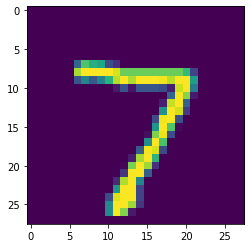

In [127]:
'''
Reshape para entrada da rede neural. 
Para o formato de entrada do keras é necessario que a ultima dimensão
indique o quantidade de canais considerado na imagem
'''
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
plt.imshow(X_test[0])

In [128]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [129]:
# Construindo a rede

cnn_classifier = Sequential()

cnn_classifier.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))

cnn_classifier.add(Conv2D(16, (3,3), activation = 'relu'))
cnn_classifier.add(MaxPooling2D(pool_size = (2,2)))
cnn_classifier.add(Flatten())

cnn_classifier.add(Dense(units = 128, activation = 'relu'))
cnn_classifier.add(Dropout(0.2))
cnn_classifier.add(Dense(units = 10, activation = 'softmax'))
cnn_classifier.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])


In [130]:
training_generator = ImageDataGenerator(rotation_range = 7, # Range em graus de rotação
                                         horizontal_flip = True, # inverte a imagem horizontalmente
                                         shear_range = 0.2, # faz alteração no valores do pixels
                                         height_shift_range = 0.07, # modifica a altura da imagem
                                         zoom_range = 0.2) # range do zoom
test_generator = ImageDataGenerator()

In [131]:
data_train = training_generator.flow(X_train, y_train, batch_size = 128)
data_test = test_generator.flow(X_test, y_test, batch_size = 128)

In [132]:
cnn_classifier.fit_generator(data_train, steps_per_epoch = 60000 / 128,
                            epochs = 30, validation_data = data_test,
                            validation_steps = 10000 / 128)

/home/vfreire/anaconda3/envs/envcnn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
468/468 [==============================] - 39s 81ms/step - loss: 1.0730 - accuracy: 0.6407 - val_loss: 0.1527 - val_accuracy: 0.9536
Epoch 2/30
468/468 [==============================] - 47s 101ms/step - loss: 0.2844 - accuracy: 0.9134 - val_loss: 0.0954 - val_accuracy: 0.9690
Epoch 3/30
468/468 [==============================] - 41s 87ms/step - loss: 0.2066 - accuracy: 0.9356 - val_loss: 0.0810 - val_accuracy: 0.9741
Epoch 4/30
468/468 [==============================] - 38s 80ms/step - loss: 0.1601 - accuracy: 0.9515 - val_loss: 0.0640 - val_accuracy: 0.9794
Epoch 5/30
468/468 [==============================] - 45s 96ms/step - loss: 0.1442 - accuracy: 0.9543 - val_loss: 0.0503 - val_accuracy: 0.9824
Epoch 6/30
468/468 [==============================] - 41s 87ms/step - loss: 0.1286 - accuracy: 0.9605 - val_loss: 0.0557 - val_accuracy: 0.9815
Epoch 7/30
468/468 [==============================] - 39s 84ms/step - loss: 0.1157 - accuracy: 0.9641 - val_loss: 0.0459 - val_accuracy

Imagem sorteada: 
Classificação:  0
Probabilidades:  [9.99734938e-01 1.46466261e-14 2.95052041e-06 1.10523874e-08
 2.52155292e-08 2.20395179e-07 2.08459212e-04 8.91789198e-10
 1.22619142e-07 5.33376988e-05]


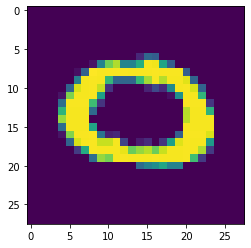

In [142]:
rand_value = np.random.randint(X_test.shape[0])
print('Imagem sorteada: ')
plt.imshow(X_test[rand_value])
predict = cnn_classifier.predict( np.array([X_test[rand_value]]) )
print('Classificação: ', np.argmax(predict))
print('Probabilidades: ', predict[0])

In [134]:
cnn_classifier.save('mycnn')

INFO:tensorflow:Assets written to: mycnn/assets


In [135]:
mycnn = keras.models.load_model('mycnn')

Imagem sorteada: 
Classificação:  9
Probabilidades:  [4.9308021e-08 2.7092309e-08 4.2761778e-05 1.3171542e-04 2.3490825e-04
 1.6191683e-04 9.0649834e-08 1.2954421e-03 4.3368639e-04 9.9769956e-01]


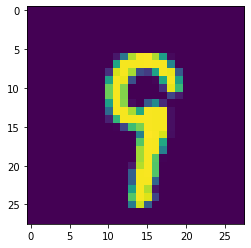

In [140]:
rand_value = np.random.randint(X_test.shape[0]-1)
print('Imagem sorteada: ')
plt.imshow(X_test[rand_value])
predict = mycnn.predict(np.array([X_test[rand_value]]))
print('Classificação: ', np.argmax(predict))
print('Probabilidades: ', predict[0])

In [137]:
mycnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               51328     
_________________________________________________________________
dropout (Dropout)            (None, 128)              